In [1]:
from build.sabre import CouplingCircuit
from build.sabre import Backend as Backend_cpp
from build.sabre import Model as Model_cpp
from build.sabre import SabreLayout as SabreLayout_cpp 
from build.sabre import SabreRouting as SabreRouting_cpp
from build.sabre import DAGCircuit as DAGCircuit_cpp
from build.sabre import CouplingCircuit as CouplingCircuit_cpp
from build.sabre import InstructionNode as InstructionNode_cpp
from build.sabre import Layout as Layout_cpp

from test_cpp import *
from utils import *

import numpy as np
import time

import sys
sys.path.append("/Users/air/workspace/qusteed")
from qusteed.dag.dag_circuit import DAGCircuit
from qusteed.passes.mapping.routing.sabre_routing import SabreRouting
from qusteed.passes.mapping.layout.sabre_layout import SabreLayout
from qusteed.passes.model import Model
from qusteed.backends.backend import Backend
from qusteed.passes.datadict import DataDict
from qusteed.dag.circuit_dag  import circuit_to_dag, dag_to_circuit, draw_dag
from qusteed.dag.instruction_node import InstructionNode 
from qusteed.graph.couplinggraph import CouplingGraph
from qusteed.utils.random_circuit import RandomCircuit 


from qusteed.compiler.transpiler import Transpiler



%load_ext autoreload
%autoreload 2



In [2]:
c_circuit, c_circuit_cpp = test_coupling()

model = get_preset_model()
qc = get_random_qc()

dag = circuit_to_dag(qc)
sabre_layout = SabreLayout()
sabre_layout.set_model(model)

dag_cpp = QuantumCircuit_to_cppDag(qc)
sabre_layout_cpp = SabreLayout_cpp(c_circuit_cpp)

Backend Created
Model with backend created


In [3]:
sabre_routing = SabreRouting()
sabre_routing.set_model(model)


st = time.time()
res = sabre_layout.run(qc)
# res = sabre_routing.run(dag)
print(f"python-time: {time.time()-st}")

python-time: 1.5520780086517334


In [5]:
st = time.time()
res_cpp = sabre_layout_cpp.run(dag_cpp)
print(f"cpp-time: {time.time()-st}")


layout testQubits used: cpp-time: 0.13173770904541016
5
Circuit qubits: 5
routing testQubits used: 5
Circuit qubits: 5
routing testQubits used: 5
Circuit qubits: 5
routing testQubits used: 5
Circuit qubits: 5
routing testQubits used: 5
Circuit qubits: 5
routing testQubits used: 5
Circuit qubits: 5
routing testQubits used: 5
Circuit qubits: 5
routing testQubits used: 5
Circuit qubits: 5


In [6]:
# qc.plot_circuit()
# qc_cpp.plot_circuit()

array([-0.03361317+0.11705654j, -0.10227971-0.26329201j,
        0.00431164-0.10547967j,  0.0509078 -0.07466767j,
       -0.09398238+0.02430998j, -0.09583192-0.06103234j,
        0.13917667+0.11638163j, -0.04284086-0.03327301j,
       -0.13177027+0.12912415j,  0.16110243+0.16276135j,
        0.00432178-0.07047632j,  0.04348206-0.08905855j,
        0.13311483-0.21610964j, -0.24557722+0.045603j  ,
       -0.12600214+0.0442143j ,  0.02706399+0.1668187j ,
        0.11472634+0.31406479j, -0.03825433+0.06501205j,
       -0.10665963+0.10921338j, -0.0643159 -0.05115937j,
        0.10733596-0.14379526j, -0.11850011+0.01158113j,
       -0.13824019+0.08414864j,  0.24858482+0.08428958j,
       -0.04849058+0.07753867j, -0.06092703+0.12809646j,
       -0.0864188 +0.00306871j,  0.02468179+0.33653696j,
       -0.07047745+0.10720541j,  0.16188808+0.00334414j,
        0.1475319 +0.17481489j,  0.0351638 -0.13531215j])

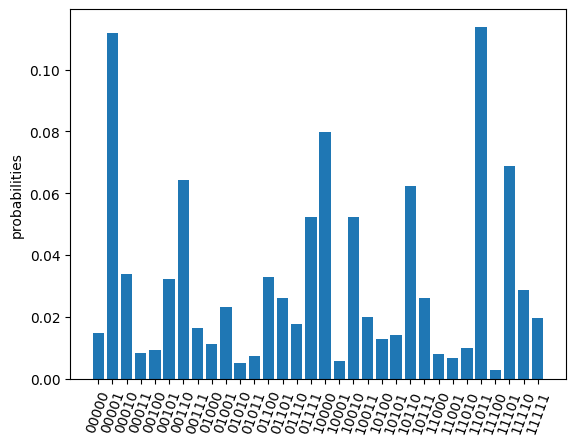

In [7]:
from quafu import simulate

simu_res = simulate(qc, output="probabilities")
simu_res.plot_probabilities()
simu_res = simulate(qc, output="state_vector")
simu_res.get_statevector()

array([ 0.03945899-0.01663428j,  0.02576118+0.00355759j,
        0.02387988+0.02821011j, -0.14983142-0.00338694j,
       -0.01518322+0.00622782j, -0.1658012 +0.01041351j,
        0.09111334-0.00203437j,  0.10170292+0.09014088j,
       -0.29602322-0.03406963j,  0.01042869-0.23279872j,
        0.00369058+0.05772912j, -0.08370091+0.13580386j,
        0.00478436+0.10496741j,  0.071642  +0.13861456j,
       -0.04080301-0.08602337j, -0.13761787-0.16597768j,
       -0.11167366-0.11148549j,  0.00980904+0.12297394j,
        0.12214465-0.17253149j,  0.00176513-0.00844927j,
       -0.02286161+0.10731898j, -0.28744961-0.14982951j,
        0.15010994-0.00887985j, -0.07595786+0.08623609j,
        0.04274784+0.08258548j, -0.07149074-0.10530913j,
       -0.44753163+0.10091612j,  0.18276919+0.1971544j ,
        0.24952524-0.10675206j,  0.00979132-0.03476729j,
        0.1158141 -0.11147984j,  0.07457254-0.06648686j])

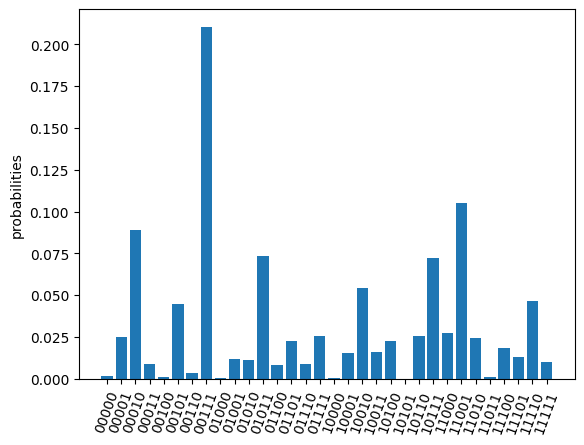

In [403]:
from quafu import simulate

qc_cpp = cppDag_to_QuantumCircuit(res_cpp)

cpp_simu_res = simulate(qc_cpp, output="probabilities")
cpp_simu_res.plot_probabilities()
cpp_simu_res = simulate(qc_cpp, output="state_vector")
cpp_simu_res.get_statevector()

In [400]:
print("---- python ----")

sabre_routing = SabreRouting()
sabre_routing.modify_dag = True
sabre_routing.set_model(model)

st = time.time()
res = sabre_routing.run(dag)
print(f"python-time: {time.time()-st}")
# draw_dag(res)


---- python ----
python-time: 0.5330421924591064


In [401]:
print("----  c++   ----")
model_cpp = Model_cpp() 
model_cpp.init_layout =  Layout_cpp(sabre_routing.model._layout["initial_layout"].v2p)
sabre_routing_cpp = SabreRouting_cpp(c_circuit_cpp)
sabre_routing_cpp.modify_dag = True
sabre_routing_cpp.set_model(model_cpp)
st = time.time()
mapped_dag_cpp = sabre_routing_cpp.run(dag_cpp)
print(f"cpp-time: {time.time()-st}")
# mapped_dag_cpp.draw_self()
# dag_cpp.print_self()

----  c++   ----
cpp-time: 0.029529809951782227
